In [1]:
#Importing the necessory Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2hsv
from skimage import io
from skimage import data
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift
import os.path
import glob
from tqdm import tqdm_notebook
import cv2
import copy

In [2]:
#Main directory where all the frames are present for stitching
# main_dir=r'C:\Users\mkhat\Desktop/frames/'
main_dir=r'C:\Users\Muhammad Uzair\Desktop\frames\\'
my_list=glob.glob(main_dir+ '*')
my_list
#list_names contains drive path of each image, which are sequentially stored.
list_names=sorted(my_list)

In [3]:
list_names=my_list

In [4]:
list_names

['C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00001.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00011.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00021.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00031.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00041.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00051.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00061.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00071.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00081.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00091.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00101.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00111.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00121.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00131.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00141.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00151.png',
 'C:\\Us

In [26]:
#make empty image (big enough to store whole slide image)
empty=np.zeros((14000,44000,3))
# empty=np.zeros((2800,5800,3))
empty=empty.astype(np.uint8)

In [27]:
#function to implement the laplacian blending between overlapping regions during stitching
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr

In [28]:
#function to implement the laplacian blending between overlapping regions during stitching
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

In [29]:
#function to implement the laplacian blending between overlapping regions during stitching
def blend(laplacian_A,laplacian_B,mask_pyr):
    LS = []
    for la,lb,mask in zip(laplacian_A,laplacian_B,mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        LS.append(ls)
    return LS

In [30]:
#function to implement the laplacian blending between overlapping regions during stitching
def reconstruct(laplacian_pyr):
    laplacian_top = laplacian_pyr[0]
    laplacian_lst = [laplacian_top]
    num_levels = len(laplacian_pyr) - 1
    for i in range(num_levels):
        size = (laplacian_pyr[i + 1].shape[1], laplacian_pyr[i + 1].shape[0])
        laplacian_expanded = cv2.pyrUp(laplacian_top, dstsize=size)
        laplacian_top = cv2.add(laplacian_pyr[i+1], laplacian_expanded)
        laplacian_lst.append(laplacian_top)
    return laplacian_lst

In [31]:
#No of levels of pyramaid of the Image picture
num_levels = 7

0 1
4420
0 2
offset x, ys =  -4.0 ,  116.0
4536
2 3
offset x, ys =  -5.0 ,  132.0
4668
3 4
offset x, ys =  -7.0 ,  161.0
4829
4 5
offset x, ys =  -9.0 ,  208.0
5037
5 6
offset x, ys =  -7.0 ,  154.0
5191
6 7
offset x, ys =  -7.0 ,  163.0
5354
7 8
offset x, ys =  -4.0 ,  103.0
5457
8 9
offset x, ys =  -11.0 ,  250.0
5707
9 10
offset x, ys =  -8.0 ,  186.0
5893
10 11
offset x, ys =  -5.0 ,  126.0
6019
11 12
offset x, ys =  -13.0 ,  299.0
6318
12 13
offset x, ys =  -6.0 ,  138.0
6456
13 14
6456
13 15
offset x, ys =  -11.0 ,  211.0
6667
15 16
6667
15 17
offset x, ys =  -14.0 ,  305.0
6972
17 18
offset x, ys =  -7.0 ,  142.0
7114
18 19
offset x, ys =  -17.0 ,  368.0
7482
19 20
offset x, ys =  -1.0 ,  108.0
7590
20 21
7590
20 22
offset x, ys =  -15.0 ,  330.0
7920
22 23
7920
22 24
offset x, ys =  -17.0 ,  357.0
8277
24 25
offset x, ys =  -7.0 ,  163.0
8440
25 26
offset x, ys =  -6.0 ,  122.0
8562
26 27
offset x, ys =  -9.0 ,  184.0
8746
27 28
offset x, ys =  -9.0 ,  203.0
8949
28 29
offset x

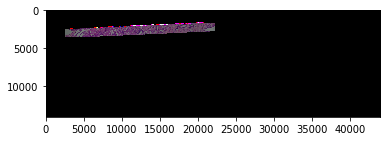

97 101
22224
97 102
22224
97 103
22224
97 104
offset x, ys =  -4.0 ,  105.0
22329
104 105
offset x, ys =  -7.0 ,  148.0
22477
105 106
offset x, ys =  -15.0 ,  330.0
22807
106 107
offset x, ys =  -8.0 ,  176.0
22983
107 108
offset x, ys =  -17.0 ,  366.0
23349
108 109
offset x, ys =  -8.0 ,  188.0
23537
109 110
offset x, ys =  -11.0 ,  243.0
23780
110 111
offset x, ys =  -7.0 ,  149.0
23929
111 112
offset x, ys =  -10.0 ,  206.0
24135
112 113
offset x, ys =  -7.0 ,  159.0
24294
113 114
offset x, ys =  -11.0 ,  223.0
24517
114 115
offset x, ys =  -19.0 ,  427.0
24944
115 116
offset x, ys =  -16.0 ,  356.0
25300
116 117
offset x, ys =  -13.0 ,  280.0
25580
117 118
offset x, ys =  -14.0 ,  302.0
25882
118 119
25882
118 120
offset x, ys =  -8.0 ,  162.0
26044
120 121
offset x, ys =  -5.0 ,  123.0
26167
121 122
offset x, ys =  -8.0 ,  172.0
26339
122 123
offset x, ys =  -9.0 ,  184.0
26523
123 124
26523
123 125
offset x, ys =  -13.0 ,  256.0
26779
125 126
26779
125 127
offset x, ys =  -8.0 ,

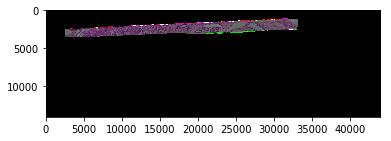

200 201
offset x, ys =  26.0 ,  -567.0
19758
201 202
offset x, ys =  12.0 ,  -261.0
19497
202 203
offset x, ys =  21.0 ,  -452.0
19045
203 204
offset x, ys =  24.0 ,  -505.0
18540
204 205
offset x, ys =  24.0 ,  -521.0
18019
205 206
offset x, ys =  20.0 ,  -401.0
17618
206 207
offset x, ys =  13.0 ,  -294.0
17324
207 208
offset x, ys =  13.0 ,  -253.0
17071
208 209
offset x, ys =  19.0 ,  -408.0
16663
209 210
offset x, ys =  10.0 ,  -234.0
16429
210 211
offset x, ys =  13.0 ,  -279.0
16150
211 212
offset x, ys =  16.0 ,  -352.0
15798
212 213
15798
212 214
15798
212 215
offset x, ys =  16.0 ,  -396.0
15402
215 216
offset x, ys =  22.0 ,  -453.0
14949
216 217
offset x, ys =  5.0 ,  -116.0
14833
217 218
offset x, ys =  6.0 ,  -130.0
14703
218 219
offset x, ys =  13.0 ,  -285.0
14418
219 220
offset x, ys =  12.0 ,  -274.0
14144
220 221
offset x, ys =  15.0 ,  -338.0
13806
221 222
offset x, ys =  8.0 ,  -164.0
13642
222 223
offset x, ys =  8.0 ,  -180.0
13462
223 224
offset x, ys =  10.0 , 

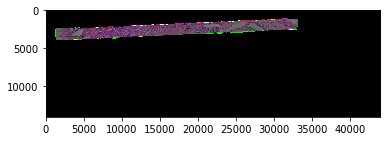

300 301
offset x, ys =  -8.0 ,  192.0
7180
301 302
offset x, ys =  -11.0 ,  272.0
7452
302 303


KeyboardInterrupt: 

In [32]:
#initial position pointer for width and height
last_height_position=2500
last_width_position=2500
# last_height_position=500
# last_width_position=500
#creating variables for cropping purpose at the last step after stitching
#remember height rules will be inverse
left_most_minimum_width_position=last_width_position
right_most_maximum_width_position=last_width_position
maximum_height_position=last_height_position
minimum_height_position=last_height_position
#first time we need to place a full image at start
im=io.imread(list_names[0])
empty[last_height_position:last_height_position+im.shape[0],last_width_position:im.shape[1]+last_width_position,:]=im
last_width_position=im.shape[1]+last_width_position
#This is the main loop where all the upcoming images are stitched together
#These indexes used to ensure that any two images which needs to be stitched has overlap as less as possible
idx1 = int(0)
idx2 = int(1)
x=0
for i in range(len(list_names)-3):
    #read the first two images (consecutive images)
    print(idx1,idx2)
    im1=io.imread(list_names[idx1])
    im2=io.imread(list_names[idx2])
    
    #using cross co-relation find the offset between the images in both X and Y direction
    shift, error, diffphase = register_translation(im1, im2)
    if(abs(shift[0]) < 80 and abs(shift[1]) < 100):
        idx2+=1
    else:
        print("offset x, ys = ", shift[0], ", ", shift[1])
#         shift[1] refers to the width change pixel amount between two images
#         if shift[1]>0 means that new uncommon region from image2 
#         must be added from right side ending point of image1
#         and vice versa
#             if (shift[1]>=0):
#                 print('Right movement')
#             else:
#                 print('Left Movement')
        #update the position pointers with the generated offset
        last_height_position=last_height_position+int(shift[0])
        last_width_position=int(shift[1])+last_width_position
        #make the probablity mask image where in which the area will be 1 where
        #there is overlap of image with the existing area of empty array (where image 2 has to be pasted fully)
        p = np.where(empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] > 1, 0, 1)
        p = p.astype(np.float32)
        #only paste the Non-overlapping area in the big empty array
        empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] += (p*im2).astype(np.uint8)
        #now extract the region where Im2 needs to be fully pasted and expand that image 100 pixels in each direction
        a = copy.copy(empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:])
        #now completely paste image2 in its location in the empty array
        empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] = im2
        #now again extract the region where Im2 needs to be fully pasted (which is now pasted) and expand that image 100 pixels in each direction
        b = copy.copy(empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:])
        #now we have the source and target image, mask generation is needed only now
        m = np.zeros(a.shape).astype(np.float32)
        #make it white where overlapping area exists
        m[100:-150,150:-150,:] = 1
        #now perform the laplacian blendind technieque
        gaussian_pyr_1 = gaussian_pyramid(a, num_levels)
        laplacian_pyr_1 = laplacian_pyramid(gaussian_pyr_1)
        gaussian_pyr_2 = gaussian_pyramid(b, num_levels)
        laplacian_pyr_2 = laplacian_pyramid(gaussian_pyr_2)
        mask_pyr_final = gaussian_pyramid(m, num_levels)
        mask_pyr_final.reverse()
        add_laplace = blend(laplacian_pyr_1,laplacian_pyr_2,mask_pyr_final)
        final  = reconstruct(add_laplace)
        reconstructed = final[num_levels]
        reconstructed = reconstructed.astype(np.uint8)
        #now paste the complete blended result into main empty array.
        empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:] = reconstructed 
        idx1 = idx2
        idx2 = idx1 + 1
       #now updating variables fo cropping
    if (shift[1]<0):
        if (left_most_minimum_width_position>last_width_position-im2.shape[1]):
            left_most_minimum_width_position=last_width_position-im2.shape[1]
    if (right_most_maximum_width_position<last_width_position):
        right_most_maximum_width_position=last_width_position
    if (maximum_height_position)<last_height_position+im2.shape[0]:
        maximum_height_position=last_height_position+im2.shape[0]
    if (minimum_height_position>last_height_position):
        minimum_height_position=last_height_position
#     plt.imsave(r'C:\Users\Muhammad Uzair\Desktop\step_wise/image'+str(x) +'.tiff',empty)
    x=x+1
#     plt.imsave(r'C:\Users\Muhammad Uzair\Desktop\sample_photos_stichting\stiched images in series/laplace' +str(i),empty)    
    print(last_width_position)
    if(x==100):
        x=0
        plt.imshow(empty)
        plt.show()

In [33]:
plt.imsave(r'Desktop\letshopeforthebest1.tiff', empty[minimum_height_position:maximum_height_position,left_most_minimum_width_position:right_most_maximum_width_position,:])

In [ ]:
plt.imshow(empty)